# Supplement to "Inferring Ethiopian Nile tilapia (Oreochromis niloticus) morphotypes with machine learning"
(C) P. Sykacek 2020 <peter@sykacek.net>

This code is available under a GPL v3.0 license and comes without any explicit or implicit warranty.

## Evaluation of Tilapia GP-LVM features and GPA transformed landmarks
The approach relies on subsampling / reshuffling with identical sample indices used accross all competing methods (GPC for GP-LVM features and GPA transformed landmarks and CNNs on images) to obtain probabiliteis for class, class labels and ARD assessments. We compare the results with Neals HMC-MLP against Gaussian process classification results and CNN / deep learning based results.
## Load the data

In [1]:
## load libraries for data handling. 
import numpy as np
import pandas as pd
## we have patterns for the different input data 
## 1) procrustes landmarks
## 2) 14 top ranked GP-LVM dimensions
## 3) 14 selected GP-LVM dimensions which 
##    have no noticeable technical variation 
##    (to avoid clever Hans effects)
##
## For every input modality we resample 
## a) 10 times by reshuffling
## b) 10 times by resampling with replacement (bootstrap)
##
## Every instnace is assessed by 10 fold cv with
##
## Neals HMC-MLP (20 hidden units level 1 ARD) (60 result files)
## GPC from the Ghahramani group               (60 result files)
## 
## Images are analysed directly using a
## CNN Implementation from the Tensorflow Python binding. 
## (20 result files)
## for data loading and metrics calculation we use the evalres.py 
## library functions
import evalres as evr
## use the code to load all prediction results and produce a
## respective dataframe.
resdir="../../Data/resdata/"
## 1) load the experimental description
infodf=evr.info2df(evr.infomap)
## the iteration parterns in files is 0..9 (including)
idsperpatt=list(range(10))
allresdict=evr.loadallres(resdir, infodf , idsperpatt)
## we may now convert the results to metrics.  This needs to consider
## the dofferent samüple orders in bootstrap and reshuffle. providing
## samplesel as specified will analyse 'Bootstrapped' resampled data
## and 'Reshuffled' resampled data as separate groups. The latter is
## required as McNemar can not compare different sample orders.#
##
samplesel={'bootstrap':{'resampling':'Bootstrapped'}, 'reshuffle':{'resampling':'Reshuffled'}}
##samplesel={'reshuffle':{'resampling':'Reshuffled'}}
annotatedresults=evr.resdict2metrics(allresdict, infodf, selinfo=samplesel)
## annotatedresults is a dataframe which contains the following 
## metrics (column names)
## 'Acc': generalisation accuracy, 'MI': mutual information, 
##
## 'Sig': McNemar significance when comparing against the least 
## performing competitor in each group (that is calculated separately 
## for 'Bootstrapped' and 'Reshuffled' data.

## To avoid problems with visualisation we threshold McNemar 
## Significance levlels below 0.999
##affectedrows=annotatedresults.index[annotatedresults["Sig"]>0.999]
##print(affectedrows)
##annotatedresults.loc[affectedrows, "Sig"]=0.999
## add a column with logit transformed significance values
annotatedresults["logitSig"]=evr.logit(annotatedresults["Sig"].tolist())
## comparison with default predictor
defcomp=evr.resvsdefpred(allresdict)
defcomp

Lake: Chamo sample nr.: 36
Lake: Hawassa sample nr.: 38
Lake: Koka sample nr.: 31
Lake: Langano sample nr.: 26
Lake: Tana sample nr.: 38
Lake: Ziway sample nr.: 40
Maxlabel: Ziway Cnts: 40


,key,Acc,Sig
0,Def,0.191388,9.990000e-01
1,netprcshfl,0.746411,1.616522e-25
2,netprcboot,0.888995,1.993344e-36
3,netgptopshfl,0.911005,1.233504e-39
4,netgptopboot,0.966507,5.008163e-45
5,netgpselshfl,0.752153,8.890708e-27
6,netgpselboot,0.878947,7.528320e-33
7,gpcgpselshfl,0.757416,1.652594e-27
8,gpcgpselboot,0.852632,6.404849e-35
9,gpcgptopshfl,0.885167,3.156369e-36


## Analyse reshuffled data

In [2]:
## We will now analyse the reshuffled experiments only
rsdf=annotatedresults.iloc[(annotatedresults['resampling']=='Reshuffled').tolist(), :]
## We will now prepare visualisation of gne acc by multiplying with 100
rsdf.loc[:,"Acc"]=rsdf.loc[:,"Acc"]*100
## add a predmethod column which allows specifies the applied analysis:
predmethod=[]
for index, row in rsdf.iterrows():
    #print(row['inputtype'])
    predmethod.append(row['inputtype']+'+'+row['classifier'])
rsdf["predmethod"]=predmethod
import matplotlib.pyplot as plt
## and can finally produce a boxplot for generlisation acciracy over methods
fh=4        # figure height
fw=4*fh     # and width
lbsz=20     # font size of axis legends
ttsz=28     # and plot title

/home/psykacek/sysadmin/intelpython3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/psykacek/sysadmin/intelpython3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


### Generate boxplot for generalisation accuracy

### Average metrics per group

In [3]:
rsdf.groupby("predmethod").mean()

,Acc,MI,Sig,na,nb,logitSig
predmethod,,,,,,
Deep CNV+CNN,92.583732,2.528097,2.308919e-07,10.7,55.8,-18.748042
GPA+GPC,71.004785,1.051678,9.990000e-01,0.0,0.0,6.906755
GPA+HMC-MLP,74.641148,1.671547,3.258134e-01,14.0,21.6,-0.789839
Sel GP-LVM+GPC,75.741627,1.030388,3.067789e-01,36.8,46.7,-0.909383
Sel GP-LVM+HMC-MLP,75.215311,1.544734,3.705752e-01,35.0,43.8,-0.650706
Top GP-LVM+GPC,88.516746,1.381219,1.175292e-05,15.9,52.5,-11.934857
Top GP-LVM+HMC-MLP,91.100478,2.123790,1.188363e-06,12.4,54.4,-16.042865


In [4]:
rsdf.groupby("predmethod").mean().to_latex("allmetrics.tex")

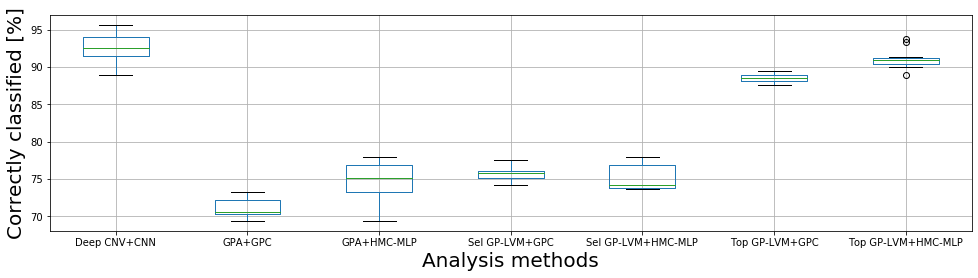

In [5]:
ax=rsdf.boxplot(column='Acc', by="predmethod", figsize=(fw, fh)) # use pandas
plt.suptitle("")      ## remove the default "By ... text"
## add annotations
#plt.title("Generalisation accuracy", fontsize=ttsz)
plt.title("", fontsize=ttsz)
plt.xlabel("Analysis methods", fontsize=lbsz)
plt.ylabel("Correctly classified [%]", fontsize=lbsz)
## generate plot and inline visualisation
plt.savefig("tilapia_genacc.pdf", bbox_inches='tight')
plt.show()

### Mutual information

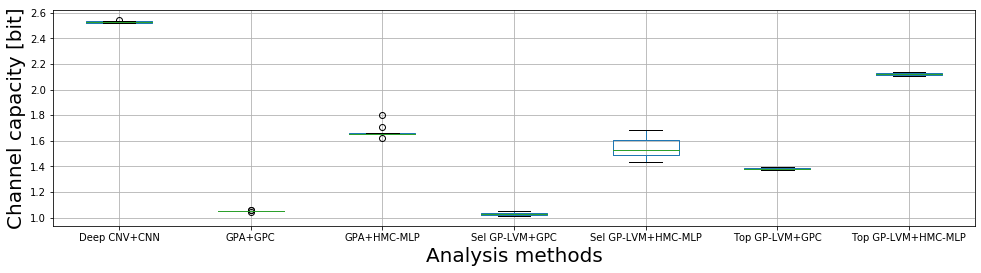

In [6]:
ax=rsdf.boxplot(column='MI', by="predmethod", figsize=(fw, fh)) # use pandas
plt.suptitle("")      ## remove the default "By ... text"
## add annotations
#plt.title("Mutual information", fontsize=ttsz)
plt.title("", fontsize=ttsz)
plt.xlabel("Analysis methods", fontsize=lbsz)
plt.ylabel("Channel capacity [bit]", fontsize=lbsz)
## generate plot and inline visualisation
plt.savefig("tilapia_mutinf.pdf", bbox_inches='tight')
plt.show()

### McNemar significance comparing against GPA+GPC

/home/psykacek/sysadmin/intelpython3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


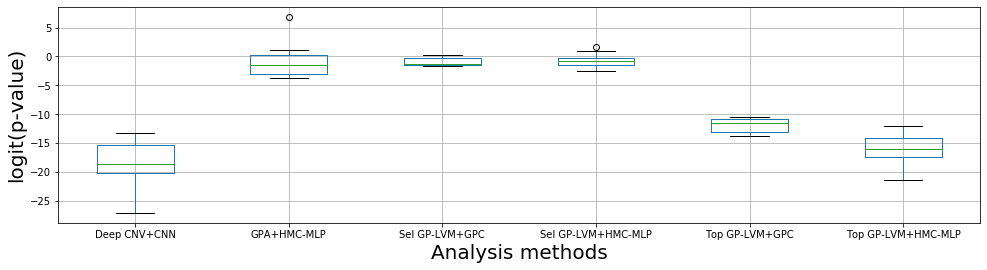

In [7]:
## McNemar significance is displayed on logit scale to enlarge differences
## Including GPA+GPC makes no sense -> we remove it from the dataframe.
rsdf.set_index("predmethod", inplace=True, drop=False)
rsdf.drop(index="GPA+GPC", inplace=True)
rsdf.reset_index(inplace=True, drop=True)
## we may now go on as above
ax=rsdf.boxplot(column='logitSig', by="predmethod", figsize=(fw, fh)) # use pandas
plt.suptitle("")      ## remove the default "By ... text"
## add annotations
#plt.title("McNemar significance levels", fontsize=ttsz)
plt.title("", fontsize=ttsz)
plt.xlabel("Analysis methods", fontsize=lbsz)
plt.ylabel("logit(p-value)", fontsize=lbsz)
## generate plot and inline visualisation
plt.savefig("tilapia_mcnemar.pdf", bbox_inches='tight')
plt.show()

In [8]:
rsdf.set_index("predmethod", inplace=True, drop=False)
rsdf.loc["GPA+HMC-MLP"]

,Acc,MI,Sig,na,nb,expgroup,acronym,ardfnam,predfnam,inputtype,resampling,classifier,logitSig,predmethod
predmethod,,,,,,,,,,,,,,
GPA+HMC-MLP,77.033493,1.659386,0.162756,12.0,20.0,reshuffle,netprcshfl,rshfl_prc_it{0}__allardres.csv,rshfl_prc_it{0}__resparse2predictions.csv,GPA,Reshuffled,HMC-MLP,-1.637866,GPA+HMC-MLP
GPA+HMC-MLP,71.291866,1.625422,0.742829,17.0,19.0,reshuffle,netprcshfl,rshfl_prc_it{0}__allardres.csv,rshfl_prc_it{0}__resparse2predictions.csv,GPA,Reshuffled,HMC-MLP,1.060727,GPA+HMC-MLP
GPA+HMC-MLP,77.990431,1.653079,0.065245,12.0,23.0,reshuffle,netprcshfl,rshfl_prc_it{0}__allardres.csv,rshfl_prc_it{0}__resparse2predictions.csv,GPA,Reshuffled,HMC-MLP,-2.662130,GPA+HMC-MLP
GPA+HMC-MLP,69.377990,1.650566,0.999000,19.0,19.0,reshuffle,netprcshfl,rshfl_prc_it{0}__allardres.csv,rshfl_prc_it{0}__resparse2predictions.csv,GPA,Reshuffled,HMC-MLP,6.906755,GPA+HMC-MLP
GPA+HMC-MLP,74.162679,1.708841,0.635828,18.0,21.0,reshuffle,netprcshfl,rshfl_prc_it{0}__allardres.csv,rshfl_prc_it{0}__resparse2predictions.csv,GPA,Reshuffled,HMC-MLP,0.557302,GPA+HMC-MLP
GPA+HMC-MLP,76.076555,1.657589,0.040960,11.0,23.0,reshuffle,netprcshfl,rshfl_prc_it{0}__allardres.csv,rshfl_prc_it{0}__resparse2predictions.csv,GPA,Reshuffled,HMC-MLP,-3.153347,GPA+HMC-MLP
GPA+HMC-MLP,73.205742,1.803289,0.187742,14.0,22.0,reshuffle,netprcshfl,rshfl_prc_it{0}__allardres.csv,rshfl_prc_it{0}__resparse2predictions.csv,GPA,Reshuffled,HMC-MLP,-1.464752,GPA+HMC-MLP
GPA+HMC-MLP,77.511962,1.649694,0.023703,12.0,26.0,reshuffle,netprcshfl,rshfl_prc_it{0}__allardres.csv,rshfl_prc_it{0}__resparse2predictions.csv,GPA,Reshuffled,HMC-MLP,-3.718178,GPA+HMC-MLP
GPA+HMC-MLP,76.555024,1.650746,0.038477,13.0,26.0,reshuffle,netprcshfl,rshfl_prc_it{0}__allardres.csv,rshfl_prc_it{0}__resparse2predictions.csv,GPA,Reshuffled,HMC-MLP,-3.218449,GPA+HMC-MLP


## Confusion tables

In [9]:
## convert allresdict to a dataframe which illustrates all confusion tables
conftab=evr.res2cnftab(allresdict)
unqmthd=list(set(conftab['clssmthd']))
unqclass=list(set(conftab['truelab']))
unqclass.sort()
conftab.set_index('clssmthd', inplace=True, drop=False)
for cmthd in unqmthd:
    tcnf=conftab.loc[cmthd,:]
    tcnf=tcnf.copy()
    tcnf=tcnf[['truelab']+unqclass]
    print(cmthd)
    print(tcnf.groupby('truelab').mean())

gpcprcshfl
         Chamo  Hawassa  Koka  Langano  Tana  Ziway
truelab                                            
Chamo     25.4      1.2   6.5      0.0   1.3    1.6
Hawassa    0.0     25.0   0.1      0.9   8.6    3.4
Koka       6.4      0.0  16.9      0.0   2.5    5.2
Langano    0.0      0.2   0.0     25.1   0.0    0.7
Tana       0.1      9.3   1.4      0.0  25.4    1.8
Ziway      1.0      1.8   3.6      1.0   2.0   30.6
netgpselboot
         Chamo  Hawassa  Koka  Langano  Tana  Ziway
truelab                                            
Chamo     31.4      0.8   1.9      1.5   0.9    1.7
Hawassa    0.2     34.9   1.2      0.8   1.4    0.1
Koka       0.9      1.5  27.5      0.1   0.1    0.7
Langano    0.2      1.1   0.2     22.4   0.4    1.3
Tana       2.0      0.2   0.4      0.2  33.6    0.7
Ziway      0.8      0.6   0.3      1.3   1.8   33.9
gpcgptopshfl
         Chamo  Hawassa  Koka  Langano  Tana  Ziway
truelab                                            
Chamo     25.0      4.0   1